In [ ]:
import pandas as pd
import os
import re


In [ ]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read().replace('\n', ' ')


1. Use the corpus from exercise no. 1 or any other Polish corpus of comparable size.


In [91]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
articles_list = []
articles_name = []
path = "/content/drive/MyDrive/ustawy"
#path = "ustawy"
for file in os.listdir(path):
    # Check whether file is in text format or not
    file_path = f"{path}/{file}"
    temp = read_text_file(file_path).replace('\n',' ')
    articles_list.append(temp.replace('\xa0', ''))
    articles_name.append(file)

2. Make sure the texts in the corpus does not contain HTML code.

Standardowe czyszczenie kodu z html

In [ ]:
import re



In [ ]:

articles_list = [re.sub('<[^<]+?>', '', text) for text in articles_list]

3. Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus.

Ładowanie spacy z w jezyku polskim oraz utworzenie listy doc bedacej tokenizacja art

In [ ]:
#from spacy.tokenizer import Tokenizer
from spacy.lang.pl import Polish
nlp = Polish()
tokenizer = nlp.tokenizer

In [ ]:
doc = [tokenizer(art) for art in articles_list]

4. Compute frequency list for each of the processed files.

Tworzenie listy wystapien za pomoca collections Counter

In [ ]:
doc_text = [[token.text for token in document] for document in doc]

In [ ]:
from collections import Counter

frequency_list = [Counter(doc) for doc in doc_text]

In [ ]:
frequency_list[1].most_common(5)

[('.', 462), (',', 271), ('z', 118), ('r', 92), ('w', 91)]

5. Aggregate the result to obtain one global frequency list.

suma wszystkich list aby uzyskać listę globalna

In [ ]:
global_frequency = sum(frequency_list, Counter())

In [ ]:
global_frequency.most_common(5)

[('.', 425044), (',', 333615), ('w', 179767), (')', 97216), ('i', 85377)]

6. Reject all entries that are shorter than 2 characters or contain non-letter characters (make sure to include Polish diacritics).

Zmniejszenie listy o malo znaczace slowa:

shorter than 2 characters -> len(token) > 1

non-letter characters -> token.is_alpha

In [ ]:
doc_words_only = [[token.text for token in document if len(token) > 1 and token.is_alpha] for document in doc]

In [ ]:
frequency_list_words = [Counter(doc) for doc in doc_words_only]

In [ ]:
global_frequency_list_words  = sum(frequency_list_words, Counter())

In [ ]:
global_frequency_list_words.most_common(5)

[('do', 55260), ('ust', 52154), ('art', 51495), ('na', 47624), ('się', 44125)]

7. Make a plot in a logarithmic scale (for X and Y):

Przygotowanie wykresu - uwzglednia on top 10 slow aby byl czytelny

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(global_frequency_list_words, orient='index').reset_index()
df = df.rename(columns={'index':'word', 0:'count'})
df.head()

,word,count
0,Tekst,190
1,ustawyprzyjęty,19
2,przez,19802
3,Senat,144
4,bez,2313


In [ ]:
df.sort_values(by=['count', 'word'], inplace=True, ascending=False)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.head(10)

,word,count
0,do,55260
1,ust,52154
2,art,51495
3,na,47624
4,się,44125
5,lub,43923
6,poz,43214
7,Nr,41035
8,oraz,31975
9,Art,28952


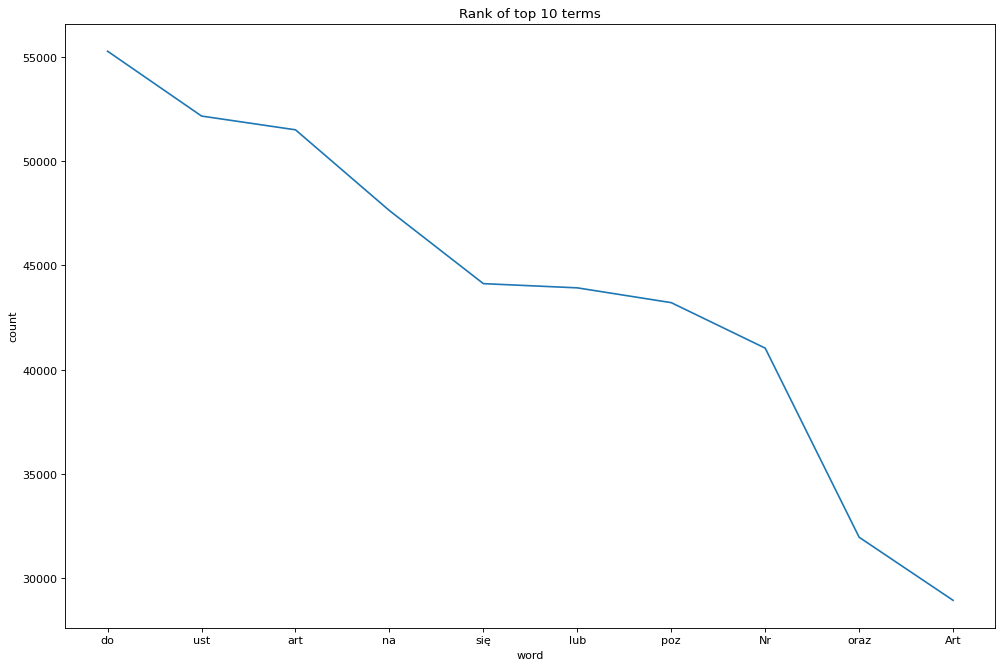

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10), dpi=80)
x = df.head(10)['word']
y = df.head(10)['count']

plt.plot(x, y)

plt.xlabel("word")
plt.ylabel("count")
plt.loglog = True
plt.title("Rank of top 10 terms")

plt.show()

8. Install Morfeusz (Binding dla Pythona) and use it to find all words that do not appear in that dictionary.

morfeusz.analyse() zwraca liste z informacjami o danym slowie. Jesli morf.analyse()[0][2][2] = "ign" oznacza ze slowa nie ma w slowniku

In [ ]:
!pip install morfeusz2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 27.1 MB/s 


In [ ]:
import morfeusz2
morf = morfeusz2.Morfeusz()

In [ ]:
print(morf.analyse(u'wher')[0][2][2])

ign


In [ ]:
word_not_in_dic = [[token.text for token in document if len(token) > 1 and token.is_alpha and morf.analyse(token.text)[0][2][2] == "ign"] for document in doc]

9. Find 30 words with the highest ranks that do not belong to the dictionary.

Top 30 slow niepoprawnych

In [ ]:
frequency_list_words_not_in_dic = [Counter(doc) for doc in word_not_in_dic]
global_frequency_list_words_not_in_dic  = sum(frequency_list_words_not_in_dic, Counter())
global_frequency_list_words_not_in_dic  = sum(frequency_list_words_not_in_dic, Counter())


In [ ]:
global_frequency_list_words_not_in_dic.most_common(30)

[('poz', 43214),
 ('późn', 880),
 ('wust', 599),
 ('októrych', 539),
 ('str', 467),
 ('októrym', 313),
 ('GMO', 295),
 ('zdnia', 286),
 ('Ministerwłaściwy', 286),
 ('októrej', 239),
 ('iNr', 215),
 ('Wustawie', 211),
 ('napodstawie', 208),
 ('SWW', 202),
 ('wprzypadku', 195),
 ('którychmowa', 195),
 ('mowaw', 192),
 ('operacyjno', 190),
 ('sięnastępujące', 189),
 ('wzakresie', 180),
 ('SKW', 169),
 ('wterminie', 167),
 ('Wprzypadku', 163),
 ('IKE', 158),
 ('MARSZAŁEKSEJMU', 157),
 ('zostałyogłoszone', 156),
 ('rolno', 156),
 ('dodajesię', 151),
 ('RzeczypospolitejPolskiej', 142),
 ('ex', 142)]

10. Find 30 random words (i.e. shuffle the words) with 5 occurrences that do not belong to the dictionary.

szukamy 30 losowych slow o dl.5 niebedacych w slowniku

In [ ]:
five_occ = [(k, v) for k, v in global_frequency_list_words_not_in_dic.items() if v == 5]

In [ ]:
import random

In [ ]:
random.shuffle(five_occ)
five_occ[:30]

[('wynikającez', 5),
 ('złożeniefałszywego', 5),
 ('PrzewodniczącyKomitetu', 5),
 ('właściwemunaczelnikowi', 5),
 ('przewidzianychw', 5),
 ('uzyskaniuzezwolenia', 5),
 ('latachsłużby', 5),
 ('przepisyprawa', 5),
 ('iinformacji', 5),
 ('izasady', 5),
 ('zpłatności', 5),
 ('wyrobówtytoniowych', 5),
 ('wyrobytytoniowe', 5),
 ('organwłaściwy', 5),
 ('odokonanie', 5),
 ('ustneżądanie', 5),
 ('porozdziale', 5),
 ('sięorzeczenia', 5),
 ('wzamian', 5),
 ('daneidentyfikujące', 5),
 ('centralnejewidencji', 5),
 ('lubd', 5),
 ('zdaniewstępne', 5),
 ('iwpłacać', 5),
 ('składekjest', 5),
 ('środowiskaokreśli', 5),
 ('dokońca', 5),
 ('zostałyuzyskane', 5),
 ('iżywienia', 5),
 ('nawykonywanie', 5)]

11. Use Levenshtein distance and the frequency list, to determine the most probable correction of the words from lists defined in points 8 and 9. (Note: You don't have to apply the distance directly. Any method that is more efficient than scanning the dictionary will be appreciated.)

uzyta zostala biblioteka editdistance zwracajaca Levenshtein distance pomiedzy 2 slowami. Sa 2 listy zawierajace po 30 blednych slow: top_words_not_in_dic, random_words_not_in_dic dla ktorych nastepnie znajdowane sa poprawniejsze wersje

points 9 and 10? 



In [ ]:
!pip install editdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import editdistance

In [ ]:
correct_words_in_dic = [[token.text for token in document if len(token) > 1 and token.is_alpha and morf.analyse(token.text)[0][2][2] != "ign"] for document in doc]

In [ ]:
correct_words_in_dic = sum(correct_words_in_dic, [])

In [ ]:
correct_words_in_dic_unique = list(set(correct_words_in_dic))

In [ ]:
top_words_not_in_dic = [key for key, _ in global_frequency_list_words_not_in_dic.most_common(30)]
random_words_not_in_dic = [key for key, _ in five_occ[:30]]

In [ ]:
def word_corrector(incc_words, corr_words):
  corrections = []
  for incorrect_word in incc_words:
    min_distance = 10000
    min_word = ''
    for correct_word in corr_words:
        Levenshtein_distance = editdistance.eval(incorrect_word, correct_word)
        if min_distance > Levenshtein_distance:
            min_distance = Levenshtein_distance
            min_word = correct_word
    corrections.append((incorrect_word, min_word))
  return corrections

In [ ]:
top_words_correction = word_corrector(top_words_not_in_dic, correct_words_in_dic)

In [ ]:
random_words_correction = word_corrector(random_words_not_in_dic, correct_words_in_dic)

In [ ]:
top_words_correction

[('poz', 'po'),
 ('późn', 'plan'),
 ('wust', 'ust'),
 ('októrych', 'których'),
 ('str', 'sto'),
 ('októrym', 'którym'),
 ('GMO', 'IMO'),
 ('zdnia', 'dnia'),
 ('Ministerwłaściwy', 'niewłaściwy'),
 ('októrej', 'której'),
 ('iNr', 'Nr'),
 ('Wustawie', 'ustawie'),
 ('napodstawie', 'podstawie'),
 ('SWW', 'WE'),
 ('wprzypadku', 'przypadku'),
 ('którychmowa', 'których'),
 ('mowaw', 'mowa'),
 ('operacyjno', 'operacyjną'),
 ('sięnastępujące', 'następujące'),
 ('wzakresie', 'zakresie'),
 ('SKW', 'Sąd'),
 ('wterminie', 'terminie'),
 ('Wprzypadku', 'przypadku'),
 ('IKE', 'WE'),
 ('MARSZAŁEKSEJMU', 'MARSZAŁEK'),
 ('zostałyogłoszone', 'ogłoszone'),
 ('rolno', 'rolne'),
 ('dodajesię', 'dodaje'),
 ('RzeczypospolitejPolskiej', 'Rzeczypospolitej'),
 ('ex', 'em')]

In [ ]:
random_words_correction

[('wynikającez', 'wynikające'),
 ('złożeniefałszywego', 'fałszywego'),
 ('PrzewodniczącyKomitetu', 'Przewodniczącymi'),
 ('właściwemunaczelnikowi', 'właścicielowi'),
 ('przewidzianychw', 'przewidzianych'),
 ('uzyskaniuzezwolenia', 'zezwolenia'),
 ('latachsłużby', 'służby'),
 ('przepisyprawa', 'przepisywania'),
 ('iinformacji', 'informacji'),
 ('izasady', 'zasady'),
 ('zpłatności', 'płatności'),
 ('wyrobówtytoniowych', 'tytoniowych'),
 ('wyrobytytoniowe', 'tytoniowe'),
 ('organwłaściwy', 'właściwy'),
 ('odokonanie', 'dokonanie'),
 ('ustneżądanie', 'żądanie'),
 ('porozdziale', 'rozdziale'),
 ('sięorzeczenia', 'orzeczenia'),
 ('wzamian', 'zamian'),
 ('daneidentyfikujące', 'identyfikujące'),
 ('centralnejewidencji', 'centralnej'),
 ('lubd', 'lub'),
 ('zdaniewstępne', 'niedostępne'),
 ('iwpłacać', 'wpłacać'),
 ('składekjest', 'składek'),
 ('środowiskaokreśli', 'środowiskowymi'),
 ('dokońca', 'końca'),
 ('zostałyuzyskane', 'uzyskane'),
 ('iżywienia', 'żywienia'),
 ('nawykonywanie', 'wykonywa

In [ ]:
with open('random_words_to_correct.txt', 'w') as f:
    for line in random_words_not_in_dic:
        f.write(f"{line}\n")